In [1]:
# Makes the display take up more of the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [2]:
# Export
import numpy as np

In [5]:
# Export
class ReplayBuffer(object):
    def __init__(self, max_size, input_shape, n_actions, algo='_', env_name='_'):
        self.memory_size = max_size
        self.name=env_name+'_'+algo
        self.memory_counter = 0
        self.state_memory = np.zeros((self.memory_size, *input_shape),
                                     dtype=np.float32)
        self.new_state_memory = np.zeros((self.memory_size, *input_shape),
                                         dtype=np.float32)

        self.action_memory = np.zeros(self.memory_size, dtype=np.int64)
        self.reward_memory = np.zeros(self.memory_size, dtype=np.float32)
        self.terminal_memory = np.zeros(self.memory_size, dtype=bool)

    def store_transition(self, state, action, reward, state_next, done):
        index = self.memory_counter % self.memory_size
        self.state_memory[index] = state
        self.new_state_memory[index] = state_next
        self.action_memory[index] = action
        self.reward_memory[index] = reward
        self.terminal_memory[index] = done
        self.memory_counter += 1

    def sample_buffer(self, batch_size):
        max_memory = min(self.memory_counter, self.memory_size)
        batch = np.random.choice(max_memory, batch_size, replace=False)

        states = self.state_memory[batch]
        actions = self.action_memory[batch]
        rewards = self.reward_memory[batch]
        states_next = self.new_state_memory[batch]
        terminal = self.terminal_memory[batch]

        return states, actions, rewards, states_next, terminal
    
    def save_memory_buffer(self): # this is ~5GB
        np.save(f'data/{self.name}_state', self.state_memory)
        np.save(f'data/{self.name}_next_state', self.new_state_memory)
        np.save(f'data/{self.name}_action', self.action_memory)
        np.save(f'data/{self.name}_reward', self.reward_memory)
        np.save(f'data/{self.name}_done', self.terminal_memory)
        np.save(f'data/{self.name}_memory_counter', [self.memory_counter])
        
    def load_memory_buffer(self, filename):        
        self.state_memory = np.load(f'data/{filename}_state.npy')
        self.new_state_memory = np.load(f'data/{filename}_next_state.npy')
        self.action_memory = np.load(f'data/{filename}_action.npy')
        self.reward_memory = np.load(f'data/{filename}_reward.npy')
        self.terminal_memory = np.load(f'data/{filename}_done.npy')
        self.memory_counter = np.load(f'data/{filename}_memory_counter.npy')[0]

In [9]:
sz=(224,224)
memory = ReplayBuffer(max_size=200, input_shape=((5,)+sz), n_actions=7, algo='TestData', env_name='ReplayBuffer')

In [10]:
# Make Fake Data
state = np.random.random_sample((5,)+sz)
p = 0.1
for i in range(301):
    next_state = np.random.random_sample((5,)+sz)
    action = np.random.randint(0, high=7, size=1, dtype=int)[0]
    reward = np.random.normal(-30430.12, 23254.63805, 1)[0]
    done = np.random.choice(a=[False, True], size=1, p=[p, 1-p])[0]
    memory.store_transition(state, action, reward, next_state, done)
    
    state = next_state

In [12]:
memory.memory_counter,memory.memory_counter % memory.memory_size, memory.name

(301, 101, 'ReplayBuffer_TestData')

In [16]:
memory.state_memory.shape

(2500, 5, 224, 224)

In [17]:
memory.sample_buffer(32)

(array([[[[5.22075891e-01, 5.99843264e-02, 3.22025269e-01, ...,
           1.29811049e-01, 4.78523731e-01, 2.08882302e-01],
          [2.22776338e-01, 6.52583420e-01, 4.16344702e-01, ...,
           1.89503849e-01, 2.49161318e-01, 8.99911880e-01],
          [2.93539405e-01, 7.01638997e-01, 8.84348035e-01, ...,
           2.55458325e-01, 4.13454801e-01, 7.55860746e-01],
          ...,
          [5.96203394e-02, 5.91910072e-02, 8.74325097e-01, ...,
           9.26166117e-01, 1.74141899e-01, 8.93940926e-01],
          [5.46918035e-01, 7.29058862e-01, 3.40594113e-01, ...,
           1.65592849e-01, 7.39484787e-01, 1.36482269e-01],
          [4.03304458e-01, 6.86803937e-01, 1.14217810e-02, ...,
           6.12763941e-01, 5.64581811e-01, 6.80474877e-01]],
 
         [[2.32440054e-01, 6.14209533e-01, 7.74993300e-01, ...,
           2.94170007e-02, 4.10365760e-02, 9.49157119e-01],
          [9.77947474e-01, 5.75700939e-01, 6.42786920e-01, ...,
           3.50029320e-01, 5.83521783e-01, 4.44037

In [18]:
#memory.save_memory_buffer()

In [67]:
memory.load_memory_buffer('Neighborhood_600s_DDQNAgent_2022-03-21')

In [68]:
memory.memory_counter, memory.memory_counter % memory.memory_size, memory.name

(168, 168, 'ReplayBuffer_TestData')

In [69]:
memory.memory_counter

168

In [70]:
memory.state_memory.shape

(2500, 4, 224, 224)

In [71]:
states, actions, rewards, states_next, terminal=memory.sample_buffer(32)

In [72]:
i=31
state=states[i]
next_state = states_next[i]
actions[i], terminal[i]

(3, False)

In [73]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

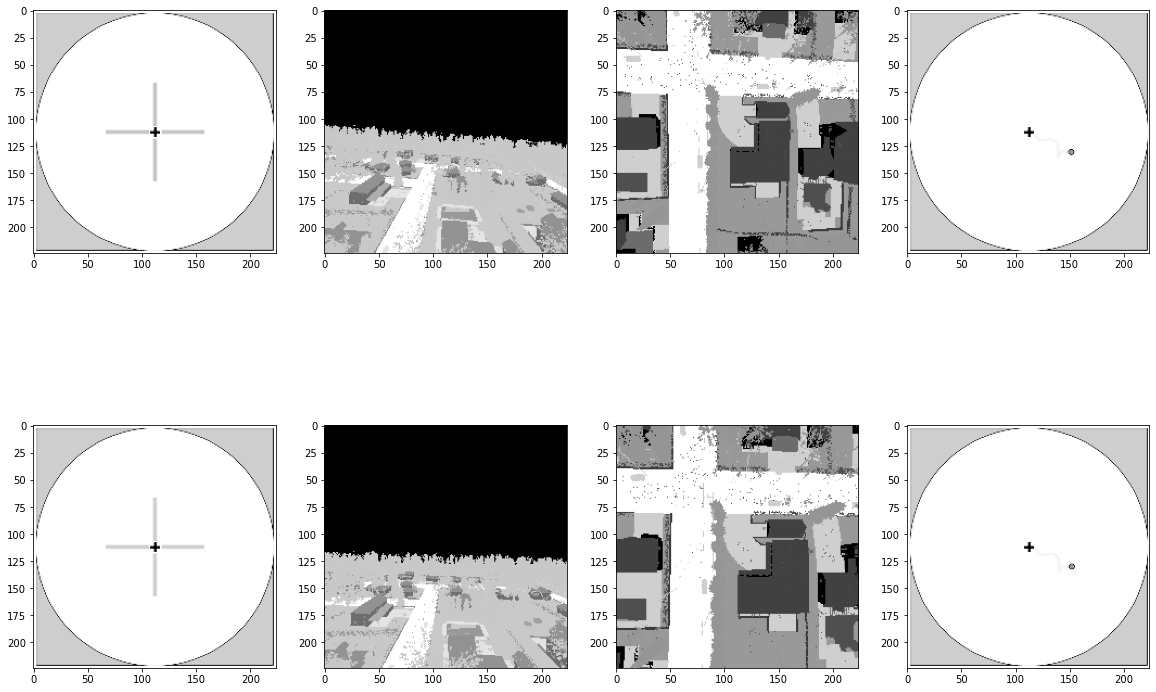

In [75]:
n_col=4
fig, ax = plt.subplots(2, n_col, figsize=(20,14))
for c in range(n_col):
    ax[0,c].imshow(state[c]*0.5+0.5, cmap='Greys_r')
    ax[1,c].imshow(next_state[c]*0.5+0.5, cmap='Greys_r')


plt.show()

In [20]:
state[0].shape

(224, 224)

In [30]:
dist=3
if dist<5: print(1)

1


In [1]:
!python notebook2script.py ReplayBuffer.ipynb

Converted ReplayBuffer.ipynb to nb_files/nb_ReplayBuffer.py


In [2]:
import datetime as dt
end=dt.datetime.now()
print(f'Finished: {end.strftime("%A %B %d, %Y")} at {end.strftime("%H:%M")}')

Finished: Friday March 18, 2022 at 19:05
